In [1]:
import torch
from torch.nn import Parameter
import numpy as np
import op_controller as opc
import data
import child_model as CM
import torch.nn.functional as F
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

In [2]:
BATCH_SIZE = 100
TEST_BATCH_SIZE = 200
cifar10 = data.CIFAR10(batch_size=BATCH_SIZE, test_batch_size=TEST_BATCH_SIZE)
test_set = list(cifar10.test)
train_set = list(cifar10.train)

Files already downloaded and verified


## Effect of channel number

In [2]:
mean_accs9 = [0.09712, 0.10733000000000001, 0.10672, 0.11137000000000001, 0.10715999999999999, 0.10837999999999999, 0.11374000000000001, 0.11405000000000001, 0.09995, 0.10632000000000001, 0.10808000000000001, 0.11155, 0.10959, 0.11115, 0.10876999999999999, 0.10927, 0.11299000000000001, 0.11281999999999999, 0.1145, 0.11296, 0.11511000000000002, 0.11923, 0.11199, 0.11364000000000002, 0.11320000000000002, 0.11681, 0.11342, 0.12567, 0.11985, 0.12247, 0.12008, 0.11673, 0.13047000000000003, 0.12586000000000003, 0.12365000000000001, 0.12562, 0.12772, 0.127, 0.12403, 0.12827000000000002, 0.11995000000000001, 0.13169, 0.1305, 0.12731, 0.13507999999999998, 0.13085, 0.13287000000000002, 0.12894000000000003, 0.13306, 0.13157, 0.13116000000000003, 0.12733, 0.12339, 0.13137000000000001, 0.12932, 0.13306, 0.13589, 0.13444, 0.13813999999999999, 0.12602000000000002, 0.13071000000000002, 0.13112000000000001, 0.13298000000000001, 0.13645, 0.13095, 0.12601, 0.13353, 0.12975, 0.13469, 0.13651, 0.13663999999999998, 0.13119, 0.13485000000000003, 0.13729, 0.13560000000000003, 0.13881, 0.13276000000000002, 0.13006, 0.14032999999999998, 0.13037, 0.14254000000000003, 0.14244, 0.13741, 0.14712, 0.13167, 0.15629, 0.13765, 0.1423, 0.15786, 0.15141000000000002, 0.14363, 0.14598000000000003, 0.14883000000000002, 0.14032, 0.15123, 0.13787, 0.13792000000000001, 0.13973000000000002, 0.15464000000000003, 0.14276, 0.15226, 0.16050999999999999, 0.15258000000000002, 0.16619, 0.16029000000000002, 0.15949000000000002, 0.15913999999999998, 0.17035000000000003, 0.16121, 0.15424000000000002, 0.15613, 0.15193, 0.16062, 0.1522, 0.15914, 0.15754, 0.15098000000000003, 0.14654000000000003, 0.14642, 0.15289000000000003, 0.15916999999999998, 0.15324000000000002, 0.16127, 0.16251, 0.17773000000000003, 0.18062, 0.16476999999999997, 0.16894, 0.18081999999999998, 0.17311, 0.15983, 0.16316, 0.17012, 0.17818, 0.16032999999999997, 0.16332, 0.18546, 0.18913, 0.18156999999999998, 0.17376, 0.19554000000000002, 0.17936000000000002, 0.18181999999999998, 0.19052999999999998, 0.18771, 0.21121, 0.17542000000000002, 0.18173000000000003, 0.19405, 0.17592000000000002, 0.16938999999999999, 0.18879, 0.19488, 0.19244999999999998, 0.19313, 0.19260000000000002, 0.17508, 0.19741000000000003, 0.20014, 0.21126999999999999, 0.18889, 0.18392000000000003, 0.19229000000000002, 0.20223000000000002, 0.21076999999999999, 0.18496, 0.21224, 0.18869, 0.19591, 0.18902999999999998, 0.20968, 0.16801999999999997, 0.18575, 0.17781, 0.18234, 0.17826, 0.19217, 0.19287, 0.19572000000000003, 0.19874, 0.19552, 0.19804000000000002, 0.22187, 0.23632, 0.20341, 0.21631999999999998, 0.21052, 0.21395, 0.21929, 0.21994, 0.23031000000000001, 0.21099, 0.23258, 0.21470000000000003, 0.23329000000000003, 0.22074, 0.22759000000000001, 0.21733, 0.23452, 0.22403, 0.20628000000000002, 0.21496, 0.22625, 0.22092, 0.23257, 0.22649, 0.23379999999999998, 0.23561, 0.22739, 0.20131, 0.21818, 0.22018000000000001, 0.22797000000000003, 0.24011000000000002, 0.23483, 0.25072, 0.24814, 0.23136, 0.22925, 0.24941000000000002, 0.24344, 0.23429, 0.23526, 0.25786000000000003, 0.24639999999999998, 0.25265, 0.24594, 0.2437, 0.25497, 0.26265000000000005, 0.25297000000000003, 0.26058000000000003, 0.25694, 0.28085999999999994, 0.25267999999999996, 0.28201, 0.28291, 0.24699000000000002, 0.24017000000000002, 0.24508, 0.25477999999999995, 0.25063, 0.25195, 0.24232000000000004, 0.27134, 0.22777, 0.28678000000000003, 0.27147000000000004, 0.27146000000000003, 0.26755, 0.25083, 0.26473, 0.24722, 0.25417999999999996, 0.23108, 0.26604, 0.24948, 0.23468, 0.26427, 0.26089000000000007, 0.28318, 0.27609, 0.27941000000000005, 0.28217000000000003, 0.26494, 0.27036, 0.24428, 0.26265, 0.28047000000000005, 0.3087, 0.26829000000000003, 0.25838, 0.25621, 0.27099, 0.28949, 0.31527, 0.29857999999999996, 0.30388, 0.28865999999999997, 0.29658, 0.29386, 0.319, 0.29559, 0.28953, 0.284, 0.30249000000000004, 0.30223, 0.30449, 0.2747, 0.2668, 0.29982, 0.32519, 0.29131999999999997, 0.31460000000000005, 0.31083999999999995, 0.2942000000000001, 0.30029999999999996, 0.27574, 0.27532, 0.27116]
mean_accs24 = [0.10128, 0.10809, 0.11163, 0.11088, 0.11421, 0.10994, 0.1129, 0.11466000000000001, 0.10714000000000001, 0.10654, 0.11218, 0.11242, 0.1075, 0.11338, 0.11248, 0.11155000000000001, 0.11904, 0.11824, 0.128, 0.11795000000000001, 0.12165000000000001, 0.12938999999999998, 0.12522, 0.13137000000000001, 0.12966, 0.13067, 0.13013, 0.1372, 0.13157999999999997, 0.14145999999999997, 0.13422, 0.13615, 0.14690000000000003, 0.15422000000000002, 0.15491, 0.14355, 0.14897, 0.15194, 0.16212000000000001, 0.15287, 0.15509, 0.16559000000000001, 0.16293000000000002, 0.16928, 0.16755, 0.15979, 0.17098000000000002, 0.15803, 0.15784, 0.16971, 0.16388000000000003, 0.17174, 0.17689999999999997, 0.16597, 0.16989, 0.18119, 0.18702, 0.17945, 0.17326999999999998, 0.16871, 0.16319, 0.17138, 0.16920000000000002, 0.18002, 0.18929, 0.19389, 0.19520999999999997, 0.19908, 0.21285, 0.20566, 0.2247, 0.20573000000000002, 0.22469, 0.22643000000000002, 0.21880000000000002, 0.22163999999999998, 0.21129000000000003, 0.20194, 0.24861, 0.22724, 0.244, 0.23435999999999998, 0.23238, 0.23481, 0.22717, 0.26336000000000004, 0.24012, 0.25104000000000004, 0.24747, 0.24401, 0.23593, 0.23442000000000002, 0.23649, 0.23255, 0.23454, 0.22102000000000002, 0.23564999999999997, 0.23981, 0.24639, 0.23822000000000002, 0.27275, 0.28155, 0.27082000000000006, 0.25892000000000004, 0.27222, 0.26618, 0.26155, 0.2761, 0.27754, 0.25873, 0.25224, 0.24637, 0.27131, 0.26988999999999996, 0.2939, 0.27732, 0.29081, 0.26824000000000003, 0.26852, 0.26136000000000004, 0.27511, 0.26099, 0.27771, 0.29981, 0.29043, 0.29977, 0.30518, 0.26804, 0.26203000000000004, 0.24229, 0.28021999999999997, 0.2675, 0.29855000000000004, 0.29477, 0.25551, 0.28489, 0.26625, 0.30388, 0.30866, 0.31365, 0.30878999999999995, 0.30138, 0.3043, 0.32836000000000004, 0.27926999999999996, 0.30670000000000003, 0.31265, 0.33039999999999997, 0.32386000000000004, 0.28873, 0.28318, 0.31267, 0.28846999999999995, 0.28062, 0.29925999999999997, 0.34502000000000005, 0.30988, 0.34481, 0.31843, 0.34264, 0.32698, 0.33057000000000003, 0.33725, 0.34568, 0.36785, 0.33388999999999996, 0.3396, 0.28079999999999994, 0.3123, 0.33279999999999993, 0.34314, 0.28529999999999994, 0.30505, 0.32927999999999996, 0.33468000000000003, 0.31756, 0.31390999999999997, 0.32838999999999996, 0.33023, 0.33292999999999995, 0.35163, 0.34148, 0.35575, 0.33876, 0.33301, 0.32710999999999996, 0.31563, 0.30379999999999996, 0.32985000000000003, 0.33622, 0.34825, 0.32199, 0.33996000000000004, 0.31980000000000003, 0.34347000000000005, 0.36140999999999995, 0.31564000000000003, 0.3225, 0.32502, 0.33399, 0.32235, 0.30627, 0.31896, 0.33737, 0.31884, 0.31848000000000004, 0.35515, 0.34985000000000005, 0.36069000000000007, 0.32171999999999995, 0.33444999999999997, 0.32618, 0.35344, 0.36702999999999997, 0.35859, 0.37942000000000004, 0.31689, 0.3292, 0.34112, 0.33746, 0.33377999999999997, 0.34769000000000005, 0.36551999999999996, 0.3703199999999999, 0.35599000000000003, 0.38337, 0.34332, 0.3855, 0.37839, 0.3915, 0.38274, 0.38553999999999994, 0.37945000000000007, 0.37360000000000004, 0.37989, 0.4094, 0.40213, 0.35702, 0.37057, 0.39215, 0.37044000000000005, 0.38025, 0.39053, 0.37076, 0.39468999999999993, 0.36610000000000004, 0.40469, 0.40082, 0.39518, 0.41457, 0.39676, 0.38135, 0.3672, 0.35591, 0.35328, 0.37063, 0.35213, 0.33842999999999995, 0.37047, 0.37828, 0.37636000000000003, 0.40752, 0.39333000000000007, 0.38203000000000004, 0.36734000000000006, 0.38432000000000005, 0.36010999999999993, 0.37814, 0.37612, 0.39488999999999996, 0.38439, 0.38035, 0.36346, 0.38427999999999995, 0.39653999999999995, 0.44205999999999995, 0.42849, 0.4475, 0.40723000000000004, 0.42225, 0.41414999999999996, 0.45056, 0.41748, 0.41196000000000005, 0.41653999999999997, 0.40754999999999997, 0.40990999999999994, 0.41325, 0.38806000000000007, 0.38513, 0.41689, 0.4452, 0.41908000000000006, 0.42863, 0.442, 0.4129900000000001, 0.4418, 0.39456, 0.37972, 0.39907]

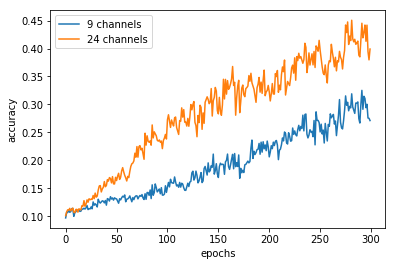

In [3]:
plt.figure()
plt.plot(mean_accs9, label="9 channels")
plt.plot(mean_accs24, label="24 channels")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend(loc=0)
#plt.savefig("../grafics/channel_comparison.png")

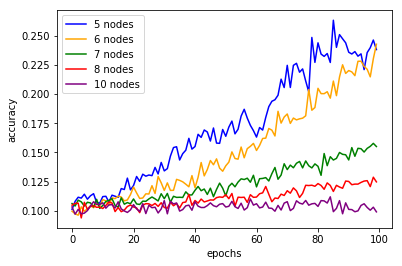

In [4]:
mean_accs5 = mean_accs24
mean_accs6 = [0.09966, 0.09741000000000001, 0.09625, 0.10336000000000001, 0.0996, 0.1017, 0.10436, 0.10262, 0.10637, 0.10411, 0.10959, 0.1085, 0.10468999999999999, 0.11109999999999999, 0.11041, 0.11259999999999999, 0.11183000000000001, 0.1085, 0.10932, 0.11384999999999999, 0.12041000000000002, 0.11528999999999999, 0.11061000000000001, 0.11096, 0.11453999999999999, 0.1144, 0.12151, 0.11485, 0.12934000000000004, 0.12398, 0.11743, 0.12393000000000001, 0.11746000000000001, 0.11757999999999999, 0.12695, 0.12607, 0.12483000000000001, 0.12281, 0.12057999999999999, 0.13013999999999998, 0.1198, 0.12871000000000002, 0.14138, 0.12993000000000002, 0.13539, 0.14308999999999997, 0.13945, 0.14451, 0.13658, 0.13392, 0.13855, 0.14171, 0.15049, 0.14483, 0.14425, 0.15466, 0.14543999999999999, 0.15328, 0.15524000000000002, 0.15775999999999998, 0.15172000000000002, 0.15605000000000002, 0.16201, 0.16228, 0.17057, 0.16912, 0.16415000000000002, 0.18529, 0.17518, 0.18037999999999998, 0.18299, 0.17491, 0.1795, 0.17793, 0.17884, 0.1794, 0.18143, 0.20399, 0.18621000000000001, 0.18852, 0.205, 0.20045000000000002, 0.20041, 0.20208, 0.19657, 0.21121, 0.1987, 0.21475, 0.22518000000000002, 0.21777, 0.22022999999999998, 0.21907, 0.21586000000000002, 0.22818, 0.22823000000000002, 0.22384000000000004, 0.22131, 0.21483, 0.23035, 0.24280000000000002]
mean_accs7 = [0.10618999999999999, 0.10411, 0.10909999999999999, 0.10767000000000002, 0.10408, 0.10729000000000001, 0.10675, 0.10321999999999999, 0.10984000000000001, 0.10203, 0.10454, 0.108, 0.10890000000000001, 0.11043, 0.10459, 0.10309, 0.11112000000000001, 0.10565000000000001, 0.10704, 0.10599000000000001, 0.11015000000000001, 0.10587, 0.10543000000000001, 0.10825, 0.10812999999999999, 0.11017, 0.11181999999999999, 0.11025, 0.10842, 0.11462, 0.11037999999999999, 0.11486000000000002, 0.10737000000000001, 0.11243, 0.11148, 0.11160000000000002, 0.11143, 0.11625999999999999, 0.11354, 0.11359999999999999, 0.11758000000000002, 0.12082999999999999, 0.11719999999999998, 0.11866, 0.11400999999999999, 0.11939, 0.11206999999999999, 0.11832, 0.12373, 0.11935000000000003, 0.1128, 0.12089, 0.12361, 0.12056, 0.12462999999999999, 0.12739, 0.12680000000000002, 0.12794, 0.12448, 0.13044999999999998, 0.12051000000000002, 0.12749000000000002, 0.12775, 0.12844, 0.12556, 0.13184, 0.13713999999999998, 0.12706, 0.13064, 0.14032, 0.13531, 0.13914999999999997, 0.13688999999999998, 0.14074, 0.14229, 0.13679000000000002, 0.14275, 0.13861, 0.13676, 0.14019, 0.13813, 0.1304, 0.14908000000000002, 0.13868, 0.14636000000000002, 0.14353000000000002, 0.14492, 0.15, 0.14839000000000002, 0.14804, 0.14357999999999999, 0.15418, 0.14674, 0.15356999999999998, 0.15321, 0.15036000000000002, 0.15352000000000002, 0.15525, 0.15781, 0.15510000000000002]
mean_accs8 = [0.10483, 0.10634, 0.10652, 0.09389, 0.10728, 0.10119999999999998, 0.10378, 0.10427000000000002, 0.10300999999999999, 0.10322999999999999, 0.10196000000000001, 0.10458, 0.10754999999999999, 0.10668, 0.0993, 0.10283, 0.09923, 0.1006, 0.1037, 0.10496000000000001, 0.10327000000000001, 0.10244, 0.09844, 0.10487, 0.10609, 0.10594999999999999, 0.10449000000000001, 0.10629999999999999, 0.10378, 0.10690999999999999, 0.10281, 0.10224, 0.10740999999999999, 0.10432000000000001, 0.10622, 0.10243000000000001, 0.10704, 0.10753, 0.1141, 0.10467, 0.10884, 0.10657, 0.11005, 0.10756, 0.10841999999999999, 0.10933000000000001, 0.10917, 0.11131, 0.11188000000000001, 0.11153, 0.11376, 0.11037999999999999, 0.11483000000000002, 0.10399, 0.11165, 0.11143, 0.11163000000000001, 0.10719, 0.11377000000000001, 0.11153, 0.11175999999999998, 0.11462, 0.11538, 0.12084, 0.11417999999999999, 0.10775, 0.11096, 0.11053, 0.11427000000000001, 0.11314000000000002, 0.11720000000000001, 0.11510000000000001, 0.11962, 0.11708000000000002, 0.11141, 0.11494, 0.12185999999999998, 0.12165000000000002, 0.12192, 0.12100999999999999, 0.12332000000000001, 0.1217, 0.11843000000000001, 0.12390000000000001, 0.12170000000000002, 0.11659, 0.12183000000000001, 0.12037, 0.11930999999999999, 0.12549, 0.12515, 0.12235, 0.12287999999999999, 0.12287000000000001, 0.12434, 0.12547, 0.12584, 0.12074, 0.12879000000000002, 0.12480000000000001, 0.12822, 0.13103000000000004, 0.12463999999999999, 0.12461000000000001, 0.12830000000000003, 0.12928, 0.128, 0.12890000000000001, 0.12934, 0.13282, 0.12484, 0.13071000000000002, 0.12710999999999997, 0.12374, 0.13151999999999997, 0.12762, 0.12542, 0.13346, 0.13419999999999999, 0.12904000000000002, 0.13233, 0.13228, 0.13245999999999997, 0.13259, 0.14092, 0.13326000000000002, 0.13717000000000001, 0.13576999999999997, 0.13215000000000002, 0.14143, 0.13016, 0.13407, 0.13652, 0.13576, 0.14165, 0.13844000000000004, 0.12643, 0.14151, 0.13451999999999997, 0.13181, 0.14999, 0.14043, 0.14816, 0.14158999999999997, 0.13943, 0.14694, 0.14365, 0.14237, 0.14356, 0.14363, 0.13778, 0.14672, 0.14581, 0.13849, 0.15313, 0.14014999999999997, 0.14257999999999998, 0.14525, 0.15517, 0.15283000000000002, 0.15041, 0.15328, 0.13829000000000002, 0.14213, 0.14914999999999998, 0.14489999999999997, 0.14707000000000003, 0.14692, 0.14143, 0.14199, 0.14718, 0.14424, 0.15732000000000002, 0.15056999999999998, 0.1459, 0.14859999999999998, 0.15387, 0.15228999999999998, 0.15486, 0.15159, 0.16284, 0.15499000000000002, 0.15742, 0.16168000000000002, 0.16575, 0.16125, 0.15761, 0.15987, 0.16071, 0.16168000000000002, 0.17362, 0.16157, 0.16542, 0.17336000000000001, 0.16876000000000002, 0.17277, 0.17055, 0.17195, 0.16565000000000002, 0.17714999999999997, 0.17021, 0.17799, 0.17454, 0.17139999999999997, 0.17628, 0.16820000000000002, 0.16733, 0.17941000000000001, 0.18029000000000003, 0.17331, 0.17721999999999996, 0.17563, 0.17886000000000002, 0.18174, 0.18366000000000002, 0.17947, 0.18169, 0.18549000000000002, 0.17242000000000002, 0.19496, 0.18456999999999998, 0.18361000000000002, 0.18857, 0.18485000000000001, 0.19094999999999998, 0.18434, 0.18231, 0.19018000000000002, 0.19678, 0.19488, 0.19127, 0.20361, 0.19871, 0.19626, 0.19594, 0.20657, 0.21318, 0.19859000000000002, 0.20184, 0.20698000000000003, 0.2002, 0.20818, 0.20334, 0.19822, 0.20614000000000002, 0.20423000000000002, 0.20768999999999999, 0.19867, 0.20449, 0.20743, 0.20836, 0.21076, 0.21117000000000002, 0.22922, 0.21609000000000003, 0.22332, 0.21775999999999998, 0.21822999999999998, 0.22276999999999997, 0.21677000000000002, 0.21389, 0.22002, 0.22156, 0.22171000000000002, 0.22818, 0.22559, 0.20851, 0.21600999999999998, 0.22584000000000004, 0.23834, 0.23620000000000002, 0.21176999999999999, 0.22577, 0.23112, 0.23592, 0.24347000000000002, 0.2335, 0.24176, 0.2365, 0.24653000000000003, 0.24459999999999998, 0.26335000000000003, 0.25338, 0.24134999999999998, 0.24436, 0.25189999999999996, 0.25303, 0.24971999999999997, 0.24394, 0.24550999999999998, 0.25786000000000003, 0.25527, 0.24484, 0.25337, 0.26308, 0.24969000000000002, 0.25816999999999996, 0.25931, 0.26607, 0.25833, 0.26074, 0.26618, 0.26844, 0.27420000000000005, 0.25935, 0.26837, 0.27776999999999996, 0.25594, 0.27995, 0.27455, 0.28158000000000005, 0.29005, 0.26753999999999994, 0.27512000000000003, 0.26273, 0.27773000000000003, 0.27058, 0.27782999999999997, 0.27135000000000004, 0.26583999999999997, 0.27099, 0.28251, 0.30075, 0.2933, 0.29701, 0.28769, 0.29788, 0.31301999999999996, 0.29605000000000004, 0.29608000000000007, 0.32468, 0.31416, 0.30478000000000005, 0.30865000000000004, 0.34228, 0.28989, 0.31581, 0.31199, 0.30251, 0.29246000000000005, 0.29451, 0.30307, 0.32024, 0.32189, 0.30781, 0.30113, 0.28833, 0.32746, 0.31801999999999997, 0.34974]
mean_accs10 = [0.10328, 0.09708, 0.10124, 0.0974, 0.09798, 0.10019, 0.10409, 0.10777, 0.10540000000000001, 0.10544999999999999, 0.10685, 0.10223, 0.10507000000000001, 0.10524000000000001, 0.10239000000000001, 0.10767, 0.10162, 0.09985000000000001, 0.09859, 0.10075, 0.10531, 0.10162, 0.09941, 0.10615000000000001, 0.09760999999999999, 0.10476, 0.10263, 0.10307000000000001, 0.09812, 0.10157, 0.10872, 0.09741, 0.10812999999999999, 0.10589, 0.1067, 0.09974, 0.10105, 0.10426, 0.10482, 0.10047, 0.10773000000000002, 0.10399000000000001, 0.10280000000000002, 0.10283000000000002, 0.10443999999999999, 0.10679, 0.10439, 0.10344, 0.10562, 0.10615000000000001, 0.10324, 0.10387, 0.10808000000000001, 0.1035, 0.10200999999999999, 0.10649000000000002, 0.10064000000000001, 0.10266000000000002, 0.11016, 0.10486000000000001, 0.10605, 0.10249000000000001, 0.10321000000000001, 0.10740999999999999, 0.10232000000000001, 0.10210000000000001, 0.09964, 0.10464, 0.10064000000000002, 0.10656, 0.1078, 0.10016, 0.10205000000000002, 0.10856, 0.10657000000000001, 0.10578, 0.10884999999999999, 0.10479000000000001, 0.10597, 0.10635, 0.10376000000000002, 0.10873000000000001, 0.1085, 0.10664, 0.11198000000000001, 0.09925, 0.10207, 0.10870999999999999, 0.09744, 0.10682000000000001, 0.10119, 0.10102000000000001, 0.09918, 0.09992999999999999, 0.10459, 0.10603, 0.10285000000000001, 0.1005, 0.10307000000000001, 0.09909, 0.10233000000000002, 0.10453, 0.10091, 0.10349000000000001, 0.10169, 0.10509, 0.10298, 0.10613000000000002, 0.10282, 0.10384, 0.10671000000000001, 0.10425, 0.10184, 0.10289, 0.10806, 0.10188000000000001, 0.10759, 0.10057, 0.1071, 0.1075, 0.10539, 0.10506, 0.10549000000000001, 0.10399000000000001, 0.11129, 0.10588000000000002, 0.11165, 0.10865000000000001, 0.10436, 0.10865000000000001, 0.10113, 0.11234000000000001, 0.10565000000000001, 0.10516, 0.10690000000000001, 0.11287, 0.10547, 0.10753, 0.10379000000000001, 0.10305000000000002, 0.10776000000000001, 0.10958, 0.11112999999999999, 0.10762000000000001, 0.11051000000000001, 0.10923999999999999, 0.10389000000000001, 0.10779000000000001, 0.10318, 0.10452000000000002, 0.1047, 0.11021, 0.11185, 0.10438999999999998, 0.11199, 0.10638, 0.10306, 0.11106999999999999, 0.11178, 0.10792, 0.10675000000000001, 0.10773, 0.10235999999999999, 0.10782000000000001, 0.10564000000000001, 0.10436000000000001, 0.10729, 0.10520000000000002, 0.10552000000000002, 0.11046, 0.10528, 0.10944, 0.10632000000000001, 0.10457000000000001, 0.11098000000000001, 0.10797, 0.10472, 0.10631, 0.10373000000000002, 0.10349000000000001, 0.10561000000000001, 0.10999, 0.11020999999999999, 0.10593999999999999, 0.10328999999999999, 0.10247999999999999, 0.10512, 0.10718000000000001, 0.1032, 0.10256, 0.10596000000000001, 0.10712, 0.10121000000000001, 0.10865000000000001, 0.10364999999999999, 0.10959, 0.107, 0.10313, 0.10720000000000002, 0.10682000000000001, 0.10477000000000002, 0.10907000000000001, 0.10838, 0.10382, 0.10402, 0.10790000000000001, 0.10099000000000001, 0.10815000000000001, 0.10749, 0.10912000000000001, 0.10704000000000001, 0.10666, 0.10774, 0.10573, 0.10893000000000001, 0.1065, 0.11059999999999999, 0.10836000000000001, 0.10925, 0.11741, 0.11284999999999999, 0.10869, 0.10768000000000001, 0.10640000000000001, 0.11471, 0.1062, 0.10647, 0.10587, 0.1078, 0.1066, 0.10818000000000001, 0.10554999999999999, 0.10625, 0.11196, 0.10502000000000002, 0.10521000000000001, 0.10876000000000001, 0.10705, 0.10754000000000001, 0.10369, 0.10875, 0.10729000000000001, 0.10689000000000001, 0.10682000000000001, 0.10779999999999999, 0.10506, 0.10590000000000001, 0.10794, 0.10394, 0.10559, 0.11224, 0.11078, 0.10733, 0.10737000000000001, 0.11433000000000001, 0.10371999999999999, 0.10731, 0.10457000000000002, 0.10764000000000001, 0.10665999999999999, 0.10751, 0.11036, 0.11122, 0.10859, 0.10807000000000001, 0.10987000000000001, 0.11009000000000001, 0.11062000000000001, 0.10834999999999999, 0.11528000000000001, 0.11163, 0.11189000000000002, 0.10618999999999999, 0.1102, 0.10665999999999999, 0.11259000000000001, 0.10936000000000001, 0.11509, 0.10769, 0.1105, 0.10844, 0.11326, 0.11508, 0.10993, 0.11254, 0.10896, 0.11144000000000001, 0.10818000000000001, 0.10969, 0.11826000000000002, 0.11198, 0.10854000000000001, 0.10834, 0.10412, 0.10740000000000001, 0.10622, 0.10664, 0.10976, 0.10951000000000001, 0.11354]

#fig, ax = plt.subplots(1, 2, sharey=True, gridspec_kw={'width_ratios': [1, 2]})
ax = [plt.figure().gca()]
ax[0].plot(mean_accs5[:100], label="5 nodes", color="blue")
ax[0].plot(mean_accs6[:100], label="6 nodes", color="orange")
ax[0].plot(mean_accs7[:100], label="7 nodes", color="green")
ax[0].plot(mean_accs8[:100], label="8 nodes", color="red")
ax[0].plot(mean_accs10[:100], label="10 nodes", color="purple")
#ax[1].plot(mean_accs5[:], label="5 nodes", color="blue")
#ax[1].plot(mean_accs8[:], label="8 nodes", color="green")
#ax[1].plot(mean_accs10[:], label="10 nodes", color="purple")
#ax[0].legend(loc=0)
ax[0].legend(loc=0)
ax[0].set_ylabel("accuracy")
ax[0].set_xlabel("epochs")
plt.show()

In [5]:
path8="..\\saved\\FC_8_500_005\\FC_8_500_005_2019_10_2_22_13_24.pt"
check8 = torch.load(path8, map_location=torch.device("cpu"))
best_accs8_new = check8["best_accs"]
mean_accs8_newp = check8["avg_accs"]
mean_accs8_new = [0.10483, 0.10634, 0.10652, 0.09389, 0.10728, 0.10119999999999998, 0.10378, 0.10427000000000002, 0.10300999999999999, 0.10322999999999999, 0.10196000000000001, 0.10458, 0.10754999999999999, 0.10668, 0.0993, 0.10283, 0.09923, 0.1006, 0.1037, 0.10496000000000001, 0.10327000000000001, 0.10244, 0.09844, 0.10487, 0.10609, 0.10594999999999999, 0.10449000000000001, 0.10629999999999999, 0.10378, 0.10690999999999999, 0.10281, 0.10224, 0.10740999999999999, 0.10432000000000001, 0.10622, 0.10243000000000001, 0.10704, 0.10753, 0.1141, 0.10467, 0.10884, 0.10657, 0.11005, 0.10756, 0.10841999999999999, 0.10933000000000001, 0.10917, 0.11131, 0.11188000000000001, 0.11153, 0.11376, 0.11037999999999999, 0.11483000000000002, 0.10399, 0.11165, 0.11143, 0.11163000000000001, 0.10719, 0.11377000000000001, 0.11153, 0.11175999999999998, 0.11462, 0.11538, 0.12084, 0.11417999999999999, 0.10775, 0.11096, 0.11053, 0.11427000000000001, 0.11314000000000002, 0.11720000000000001, 0.11510000000000001, 0.11962, 0.11708000000000002, 0.11141, 0.11494, 0.12185999999999998, 0.12165000000000002, 0.12192, 0.12100999999999999, 0.12332000000000001, 0.1217, 0.11843000000000001, 0.12390000000000001, 0.12170000000000002, 0.11659, 0.12183000000000001, 0.12037, 0.11930999999999999, 0.12549, 0.12515, 0.12235, 0.12287999999999999, 0.12287000000000001, 0.12434, 0.12547, 0.12584, 0.12074, 0.12879000000000002, 0.12480000000000001, 0.12822, 0.13103000000000004, 0.12463999999999999, 0.12461000000000001, 0.12830000000000003, 0.12928, 0.128, 0.12890000000000001, 0.12934, 0.13282, 0.12484, 0.13071000000000002, 0.12710999999999997, 0.12374, 0.13151999999999997, 0.12762, 0.12542, 0.13346, 0.13419999999999999, 0.12904000000000002, 0.13233, 0.13228, 0.13245999999999997, 0.13259, 0.14092, 0.13326000000000002, 0.13717000000000001, 0.13576999999999997, 0.13215000000000002, 0.14143, 0.13016, 0.13407, 0.13652, 0.13576, 0.14165, 0.13844000000000004, 0.12643, 0.14151, 0.13451999999999997, 0.13181, 0.14999, 0.14043, 0.14816, 0.14158999999999997, 0.13943, 0.14694, 0.14365, 0.14237, 0.14356, 0.14363, 0.13778, 0.14672, 0.14581, 0.13849, 0.15313, 0.14014999999999997, 0.14257999999999998, 0.14525, 0.15517, 0.15283000000000002, 0.15041, 0.15328, 0.13829000000000002, 0.14213, 0.14914999999999998, 0.14489999999999997, 0.14707000000000003, 0.14692, 0.14143, 0.14199, 0.14718, 0.14424, 0.15732000000000002, 0.15056999999999998, 0.1459, 0.14859999999999998, 0.15387, 0.15228999999999998, 0.15486, 0.15159, 0.16284, 0.15499000000000002, 0.15742, 0.16168000000000002, 0.16575, 0.16125, 0.15761, 0.15987, 0.16071, 0.16168000000000002, 0.17362, 0.16157, 0.16542, 0.17336000000000001, 0.16876000000000002, 0.17277, 0.17055, 0.17195, 0.16565000000000002, 0.17714999999999997, 0.17021, 0.17799, 0.17454, 0.17139999999999997, 0.17628, 0.16820000000000002, 0.16733, 0.17941000000000001, 0.18029000000000003, 0.17331, 0.17721999999999996, 0.17563, 0.17886000000000002, 0.18174, 0.18366000000000002, 0.17947, 0.18169, 0.18549000000000002, 0.17242000000000002, 0.19496, 0.18456999999999998, 0.18361000000000002, 0.18857, 0.18485000000000001, 0.19094999999999998, 0.18434, 0.18231, 0.19018000000000002, 0.19678, 0.19488, 0.19127, 0.20361, 0.19871, 0.19626, 0.19594, 0.20657, 0.21318, 0.19859000000000002, 0.20184, 0.20698000000000003, 0.2002, 0.20818, 0.20334, 0.19822, 0.20614000000000002, 0.20423000000000002, 0.20768999999999999, 0.19867, 0.20449, 0.20743, 0.20836, 0.21076, 0.21117000000000002, 0.22922, 0.21609000000000003, 0.22332, 0.21775999999999998, 0.21822999999999998, 0.22276999999999997, 0.21677000000000002, 0.21389, 0.22002, 0.22156, 0.22171000000000002, 0.22818, 0.22559, 0.20851, 0.21600999999999998, 0.22584000000000004, 0.23834, 0.23620000000000002, 0.21176999999999999, 0.22577, 0.23112, 0.23592, 0.24347000000000002, 0.2335, 0.24176, 0.2365, 0.24653000000000003, 0.24459999999999998, 0.26335000000000003, 0.25338, 0.24134999999999998, 0.24436, 0.25189999999999996, 0.25303, 0.24971999999999997, 0.24394, 0.24550999999999998, 0.25786000000000003, 0.25527, 0.24484, 0.25337, 0.26308, 0.24969000000000002, 0.25816999999999996, 0.25931, 0.26607, 0.25833, 0.26074, 0.26618, 0.26844, 0.27420000000000005, 0.25935, 0.26837, 0.27776999999999996, 0.25594, 0.27995, 0.27455, 0.28158000000000005, 0.29005, 0.26753999999999994, 0.27512000000000003, 0.26273, 0.27773000000000003, 0.27058, 0.27782999999999997, 0.27135000000000004, 0.26583999999999997, 0.27099, 0.28251, 0.30075, 0.2933, 0.29701, 0.28769, 0.29788, 0.31301999999999996, 0.29605000000000004, 0.29608000000000007, 0.32468, 0.31416, 0.30478000000000005, 0.30865000000000004, 0.34228, 0.28989, 0.31581, 0.31199, 0.30251, 0.29246000000000005, 0.29451, 0.30307, 0.32024, 0.32189, 0.30781, 0.30113, 0.33374000000000004, 0.32183, 0.32028999999999996, 0.31643999999999994, 0.30843, 0.31420000000000003, 0.33747000000000005, 0.30538, 0.33075, 0.33094, 0.32800999999999997, 0.33175, 0.34101, 0.32282, 0.33635000000000004, 0.33708, 0.33997, 0.34399, 0.34322, 0.3244, 0.32548, 0.34701, 0.34045000000000003, 0.34504, 0.3351, 0.35947, 0.36457, 0.33626999999999996, 0.34854, 0.33864, 0.33215999999999996, 0.32589, 0.32641, 0.34432, 0.35420000000000007, 0.35813, 0.32976, 0.33687, 0.35152, 0.3519, 0.3528, 0.355, 0.36477, 0.36021000000000003, 0.3454400000000001, 0.36396000000000006, 0.35799000000000003, 0.35367999999999994, 0.36668, 0.36888, 0.36431, 0.38183000000000006, 0.34645, 0.35113, 0.37199, 0.34863, 0.36394000000000004, 0.35381000000000007, 0.35637, 0.35952, 0.34721, 0.36748000000000003, 0.35733, 0.36047, 0.3525, 0.36334999999999995, 0.37532000000000004, 0.34361, 0.35384000000000004, 0.3638100000000001, 0.37433999999999995, 0.36338, 0.3454, 0.37113, 0.37748, 0.35491999999999996, 0.36143, 0.35910000000000003, 0.39189999999999997, 0.38328, 0.36901999999999996, 0.36341999999999997, 0.35549000000000003, 0.35694, 0.34813, 0.38033, 0.38853, 0.38657, 0.37494000000000005, 0.39679000000000003, 0.38947000000000004, 0.38711, 0.38519000000000003, 0.39244, 0.39952, 0.39836, 0.40073000000000003, 0.38955999999999996, 0.39808000000000004, 0.39275, 0.40597000000000005, 0.41099, 0.39491, 0.38039, 0.40503000000000006, 0.38744999999999996, 0.39162, 0.38965000000000005, 0.39, 0.38598000000000005, 0.39416, 0.39215999999999995, 0.41445, 0.38991, 0.41890999999999995, 0.40296, 0.37238, 0.40486999999999995, 0.42849, 0.40045000000000003, 0.41259, 0.4042, 0.39319, 0.42669, 0.42257, 0.4135, 0.40646000000000004, 0.38434, 0.3767, 0.41059, 0.43051, 0.39864, 0.40243, 0.40822, 0.38171, 0.41242999999999996, 0.39143, 0.42821000000000004, 0.41662, 0.41735, 0.43143, 0.43069, 0.4345, 0.41689, 0.40172, 0.41623, 0.44149, 0.45468, 0.42445, 0.38908, 0.38973, 0.42963, 0.43644, 0.4063, 0.44436000000000003, 0.41942999999999997, 0.40614, 0.40859, 0.41689, 0.42882000000000003, 0.4395, 0.42196000000000006, 0.4024, 0.42927, 0.43304999999999993, 0.416, 0.44638, 0.43223999999999996, 0.4589, 0.40034000000000003, 0.43251, 0.40982999999999997, 0.45577, 0.4463, 0.41229999999999994, 0.40529, 0.40974, 0.41429999999999995, 0.44336000000000003, 0.41856000000000004, 0.439, 0.43231, 0.43574, 0.441, 0.42060000000000003, 0.43121, 0.418, 0.42586, 0.44581, 0.44353000000000004, 0.45056999999999997, 0.447, 0.4485, 0.44089999999999996, 0.46238, 0.46511, 0.42663, 0.42569000000000007, 0.43367, 0.43360000000000004, 0.45932, 0.44703, 0.43979, 0.43578000000000006, 0.42376, 0.42006, 0.42019999999999996, 0.44603, 0.42598, 0.41352, 0.42785999999999996, 0.42107000000000006, 0.42843000000000003, 0.43281000000000003, 0.45, 0.4442, 0.44589999999999996, 0.43341999999999997, 0.41841, 0.43366, 0.45189999999999997, 0.45482999999999996, 0.44659, 0.45766999999999997, 0.43372000000000005, 0.44998, 0.41746000000000005, 0.469, 0.47264999999999996, 0.47842999999999997, 0.47516, 0.45394, 0.47502000000000005, 0.47887, 0.4746, 0.49685, 0.48684, 0.45397, 0.47348, 0.50325, 0.46037, 0.47831999999999997, 0.4663, 0.45142000000000004, 0.46515999999999996, 0.46366999999999997, 0.46865999999999997, 0.46696, 0.44777999999999996, 0.46331999999999995]
print(len(mean_accs8_newp), len(mean_accs8_new))

586 596


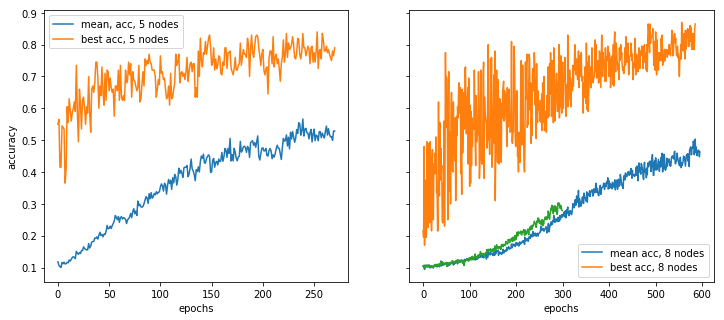

In [62]:
#%matplotlib inline
fig, ax = plt.subplots(1, 2, sharey=True, gridspec_kw={'width_ratios': [1, 1]}, figsize=(12, 5))

mean_accs5_wobase = [0.11758000000000002, 0.10690999999999999, 0.10227, 0.10017000000000001, 0.11567, 0.11180000000000001, 0.1169, 0.11112999999999999, 0.11197, 0.11641, 0.11454999999999999, 0.12360000000000002, 0.12007999999999999, 0.12539999999999998, 0.13118000000000002, 0.13399, 0.13175000000000003, 0.12787, 0.15084999999999998, 0.14497000000000002, 0.14134, 0.14678, 0.14376999999999998, 0.15343, 0.15325, 0.16465000000000002, 0.15994999999999998, 0.15663, 0.15573, 0.15514, 0.17512, 0.16098, 0.16772000000000004, 0.17987999999999998, 0.18114, 0.18241, 0.19246000000000002, 0.19136, 0.19615000000000002, 0.18927000000000002, 0.20131, 0.21075, 0.20045999999999997, 0.20423, 0.19644, 0.20481, 0.20339999999999997, 0.21347000000000002, 0.23223000000000002, 0.22160000000000002, 0.22273, 0.22991999999999999, 0.2225, 0.23167000000000001, 0.2383, 0.24634000000000003, 0.26344999999999996, 0.2577, 0.25018, 0.26012, 0.24173000000000003, 0.25708000000000003, 0.25958, 0.25215, 0.25651, 0.25465, 0.25132000000000004, 0.23797000000000001, 0.25026, 0.25284, 0.25927999999999995, 0.26949, 0.25653000000000004, 0.27509000000000006, 0.28479, 0.26885000000000003, 0.27729, 0.26324000000000003, 0.30872000000000005, 0.29418000000000005, 0.29885, 0.29059, 0.2894, 0.29167999999999994, 0.30028, 0.31127, 0.32276, 0.31817999999999996, 0.30145, 0.33192, 0.31586000000000003, 0.33507, 0.31784, 0.32199, 0.33238999999999996, 0.32825, 0.33797000000000005, 0.33134, 0.33649, 0.33734000000000003, 0.35314, 0.36252999999999996, 0.35623, 0.3401, 0.36449000000000004, 0.36001, 0.33054, 0.35785, 0.37645999999999996, 0.36398, 0.3737, 0.34530999999999995, 0.38167, 0.36569, 0.39226, 0.3848, 0.35872, 0.37572000000000005, 0.41179000000000004, 0.39554999999999996, 0.40547000000000005, 0.3965, 0.38321, 0.41337, 0.41516, 0.4148, 0.42015, 0.38525, 0.39354, 0.41208, 0.44062, 0.41014999999999996, 0.40332999999999997, 0.39212, 0.37268, 0.40703999999999996, 0.4011, 0.41613, 0.40026, 0.43276, 0.45002, 0.44338, 0.45592, 0.42834999999999995, 0.42809, 0.44226, 0.44899, 0.45393, 0.44802, 0.39857, 0.4008299999999999, 0.43697, 0.4425, 0.41499, 0.43021000000000004, 0.43324, 0.42202999999999996, 0.44048000000000004, 0.43225, 0.43638, 0.46114, 0.4334299999999999, 0.44737, 0.4738800000000001, 0.46887, 0.44606999999999997, 0.47417000000000004, 0.45853000000000005, 0.50573, 0.43445, 0.45489999999999997, 0.43454000000000004, 0.47445000000000004, 0.46237, 0.44315, 0.43513999999999997, 0.44698, 0.44944, 0.49613000000000007, 0.46247999999999995, 0.46767000000000003, 0.47944, 0.48083000000000004, 0.47644999999999993, 0.46172, 0.48015, 0.47489, 0.44615000000000005, 0.49201, 0.49562, 0.49825, 0.48392999999999997, 0.49193999999999993, 0.47782, 0.49474, 0.5134599999999999, 0.44932000000000005, 0.4377, 0.45724000000000004, 0.47411000000000003, 0.476, 0.46632, 0.46659, 0.47396999999999995, 0.45155, 0.4501899999999999, 0.4665, 0.47397, 0.46645000000000003, 0.44174, 0.45394999999999996, 0.44677, 0.45711, 0.47312000000000004, 0.48398, 0.47486, 0.47391999999999995, 0.45637, 0.43940999999999997, 0.47528, 0.5055200000000001, 0.49688999999999994, 0.49926, 0.5164200000000001, 0.48188, 0.50914, 0.47274, 0.5245599999999999, 0.50358, 0.52719, 0.5107, 0.49326, 0.50534, 0.53303, 0.52135, 0.55477, 0.55102, 0.5155899999999999, 0.52873, 0.5664399999999999, 0.51285, 0.5344, 0.5373100000000001, 0.52277, 0.52215, 0.5039100000000001, 0.523, 0.53389, 0.49449, 0.51882, 0.5345, 0.49853, 0.5159300000000001, 0.51314, 0.49818, 0.5265299999999999, 0.5270199999999999, 0.50771, 0.5219600000000001, 0.51363, 0.507, 0.52726, 0.54393, 0.5159600000000001, 0.53586, 0.5176499999999999, 0.51032, 0.51122, 0.49945, 0.5288499999999999, 0.52835]
best_accs5_wobase = [0.55, 0.565, 0.415, 0.415, 0.545, 0.54, 0.535, 0.365, 0.41, 0.605, 0.555, 0.63, 0.595, 0.56, 0.585, 0.6, 0.62, 0.59, 0.735, 0.585, 0.495, 0.66, 0.615, 0.535, 0.625, 0.635, 0.6, 0.55, 0.605, 0.585, 0.7, 0.585, 0.525, 0.66, 0.67, 0.65, 0.68, 0.745, 0.745, 0.695, 0.6, 0.67, 0.64, 0.73, 0.65, 0.61, 0.71, 0.625, 0.72, 0.715, 0.655, 0.695, 0.665, 0.65, 0.66, 0.575, 0.67, 0.67, 0.655, 0.72, 0.625, 0.735, 0.635, 0.625, 0.64, 0.625, 0.72, 0.68, 0.69, 0.745, 0.705, 0.74, 0.635, 0.715, 0.69, 0.685, 0.67, 0.655, 0.665, 0.735, 0.62, 0.63, 0.675, 0.715, 0.67, 0.755, 0.735, 0.75, 0.74, 0.77, 0.745, 0.74, 0.72, 0.72, 0.72, 0.7, 0.635, 0.66, 0.69, 0.675, 0.765, 0.71, 0.715, 0.69, 0.695, 0.66, 0.63, 0.635, 0.67, 0.61, 0.71, 0.63, 0.635, 0.66, 0.68, 0.77, 0.735, 0.745, 0.77, 0.68, 0.71, 0.715, 0.7, 0.71, 0.69, 0.715, 0.76, 0.685, 0.715, 0.74, 0.745, 0.715, 0.74, 0.74, 0.635, 0.665, 0.635, 0.78, 0.7, 0.82, 0.75, 0.73, 0.775, 0.77, 0.81, 0.77, 0.795, 0.82, 0.83, 0.79, 0.735, 0.745, 0.79, 0.72, 0.755, 0.725, 0.735, 0.765, 0.76, 0.71, 0.705, 0.745, 0.735, 0.79, 0.79, 0.725, 0.775, 0.775, 0.78, 0.725, 0.715, 0.705, 0.725, 0.76, 0.72, 0.72, 0.735, 0.74, 0.805, 0.735, 0.76, 0.785, 0.77, 0.77, 0.76, 0.82, 0.8, 0.7, 0.785, 0.83, 0.775, 0.76, 0.795, 0.825, 0.83, 0.825, 0.79, 0.765, 0.735, 0.77, 0.785, 0.72, 0.705, 0.725, 0.73, 0.645, 0.755, 0.78, 0.78, 0.74, 0.825, 0.73, 0.76, 0.77, 0.74, 0.755, 0.725, 0.685, 0.74, 0.76, 0.815, 0.745, 0.77, 0.835, 0.76, 0.805, 0.785, 0.79, 0.8, 0.825, 0.8, 0.76, 0.755, 0.775, 0.82, 0.815, 0.77, 0.755, 0.78, 0.835, 0.79, 0.79, 0.765, 0.78, 0.795, 0.785, 0.74, 0.79, 0.795, 0.745, 0.775, 0.745, 0.78, 0.84, 0.725, 0.78, 0.785, 0.755, 0.835, 0.815, 0.78, 0.78, 0.795, 0.775, 0.785, 0.77, 0.76, 0.75, 0.78, 0.765, 0.79]
mean_accs8 = [0.10483, 0.10634, 0.10652, 0.09389, 0.10728, 0.10119999999999998, 0.10378, 0.10427000000000002, 0.10300999999999999, 0.10322999999999999, 0.10196000000000001, 0.10458, 0.10754999999999999, 0.10668, 0.0993, 0.10283, 0.09923, 0.1006, 0.1037, 0.10496000000000001, 0.10327000000000001, 0.10244, 0.09844, 0.10487, 0.10609, 0.10594999999999999, 0.10449000000000001, 0.10629999999999999, 0.10378, 0.10690999999999999, 0.10281, 0.10224, 0.10740999999999999, 0.10432000000000001, 0.10622, 0.10243000000000001, 0.10704, 0.10753, 0.1141, 0.10467, 0.10884, 0.10657, 0.11005, 0.10756, 0.10841999999999999, 0.10933000000000001, 0.10917, 0.11131, 0.11188000000000001, 0.11153, 0.11376, 0.11037999999999999, 0.11483000000000002, 0.10399, 0.11165, 0.11143, 0.11163000000000001, 0.10719, 0.11377000000000001, 0.11153, 0.11175999999999998, 0.11462, 0.11538, 0.12084, 0.11417999999999999, 0.10775, 0.11096, 0.11053, 0.11427000000000001, 0.11314000000000002, 0.11720000000000001, 0.11510000000000001, 0.11962, 0.11708000000000002, 0.11141, 0.11494, 0.12185999999999998, 0.12165000000000002, 0.12192, 0.12100999999999999, 0.12332000000000001, 0.1217, 0.11843000000000001, 0.12390000000000001, 0.12170000000000002, 0.11659, 0.12183000000000001, 0.12037, 0.11930999999999999, 0.12549, 0.12515, 0.12235, 0.12287999999999999, 0.12287000000000001, 0.12434, 0.12547, 0.12584, 0.12074, 0.12879000000000002, 0.12480000000000001, 0.12822, 0.13103000000000004, 0.12463999999999999, 0.12461000000000001, 0.12830000000000003, 0.12928, 0.128, 0.12890000000000001, 0.12934, 0.13282, 0.12484, 0.13071000000000002, 0.12710999999999997, 0.12374, 0.13151999999999997, 0.12762, 0.12542, 0.13346, 0.13419999999999999, 0.12904000000000002, 0.13233, 0.13228, 0.13245999999999997, 0.13259, 0.14092, 0.13326000000000002, 0.13717000000000001, 0.13576999999999997, 0.13215000000000002, 0.14143, 0.13016, 0.13407, 0.13652, 0.13576, 0.14165, 0.13844000000000004, 0.12643, 0.14151, 0.13451999999999997, 0.13181, 0.14999, 0.14043, 0.14816, 0.14158999999999997, 0.13943, 0.14694, 0.14365, 0.14237, 0.14356, 0.14363, 0.13778, 0.14672, 0.14581, 0.13849, 0.15313, 0.14014999999999997, 0.14257999999999998, 0.14525, 0.15517, 0.15283000000000002, 0.15041, 0.15328, 0.13829000000000002, 0.14213, 0.14914999999999998, 0.14489999999999997, 0.14707000000000003, 0.14692, 0.14143, 0.14199, 0.14718, 0.14424, 0.15732000000000002, 0.15056999999999998, 0.1459, 0.14859999999999998, 0.15387, 0.15228999999999998, 0.15486, 0.15159, 0.16284, 0.15499000000000002, 0.15742, 0.16168000000000002, 0.16575, 0.16125, 0.15761, 0.15987, 0.16071, 0.16168000000000002, 0.17362, 0.16157, 0.16542, 0.17336000000000001, 0.16876000000000002, 0.17277, 0.17055, 0.17195, 0.16565000000000002, 0.17714999999999997, 0.17021, 0.17799, 0.17454, 0.17139999999999997, 0.17628, 0.16820000000000002, 0.16733, 0.17941000000000001, 0.18029000000000003, 0.17331, 0.17721999999999996, 0.17563, 0.17886000000000002, 0.18174, 0.18366000000000002, 0.17947, 0.18169, 0.18549000000000002, 0.17242000000000002, 0.19496, 0.18456999999999998, 0.18361000000000002, 0.18857, 0.18485000000000001, 0.19094999999999998, 0.18434, 0.18231, 0.19018000000000002, 0.19678, 0.19488, 0.19127, 0.20361, 0.19871, 0.19626, 0.19594, 0.20657, 0.21318, 0.19859000000000002, 0.20184, 0.20698000000000003, 0.2002, 0.20818, 0.20334, 0.19822, 0.20614000000000002, 0.20423000000000002, 0.20768999999999999, 0.19867, 0.20449, 0.20743, 0.20836, 0.21076, 0.21117000000000002, 0.22922, 0.21609000000000003, 0.22332, 0.21775999999999998, 0.21822999999999998, 0.22276999999999997, 0.21677000000000002, 0.21389, 0.22002, 0.22156, 0.22171000000000002, 0.22818, 0.22559, 0.20851, 0.21600999999999998, 0.22584000000000004, 0.23834, 0.23620000000000002, 0.21176999999999999, 0.22577, 0.23112, 0.23592, 0.24347000000000002, 0.2335, 0.24176, 0.2365, 0.24653000000000003, 0.24459999999999998, 0.26335000000000003, 0.25338, 0.24134999999999998, 0.24436, 0.25189999999999996, 0.25303, 0.24971999999999997, 0.24394, 0.24550999999999998, 0.25786000000000003, 0.25527, 0.24484, 0.25337, 0.26308, 0.24969000000000002, 0.25816999999999996, 0.25931, 0.26607, 0.25833, 0.26074, 0.26618, 0.26844, 0.27420000000000005, 0.25935, 0.26837, 0.27776999999999996, 0.25594, 0.27995, 0.27455, 0.28158000000000005, 0.29005, 0.26753999999999994, 0.27512000000000003, 0.26273, 0.27773000000000003, 0.27058, 0.27782999999999997, 0.27135000000000004, 0.26583999999999997, 0.27099, 0.28251, 0.30075, 0.2933, 0.29701, 0.28769, 0.29788, 0.31301999999999996, 0.29605000000000004, 0.29608000000000007, 0.32468, 0.31416, 0.30478000000000005, 0.30865000000000004, 0.34228, 0.28989, 0.31581, 0.31199, 0.30251, 0.29246000000000005, 0.29451, 0.30307, 0.32024, 0.32189, 0.30781, 0.30113, 0.28833, 0.32746, 0.31801999999999997, 0.34974]
best_accs8 = [0.215, 0.195, 0.48, 0.17, 0.375, 0.3, 0.195, 0.195, 0.495, 0.315, 0.225, 0.49, 0.34, 0.46, 0.24, 0.495, 0.445, 0.44, 0.215, 0.33, 0.47, 0.265, 0.25, 0.425, 0.395, 0.43, 0.46, 0.395, 0.51, 0.335, 0.355, 0.215, 0.215, 0.62, 0.385, 0.325, 0.555, 0.375, 0.475, 0.395, 0.42, 0.25, 0.24, 0.365, 0.335, 0.56, 0.23, 0.425, 0.775, 0.54, 0.7, 0.69, 0.58, 0.25, 0.48, 0.715, 0.34, 0.37, 0.525, 0.3, 0.615, 0.65, 0.575, 0.405, 0.4, 0.62, 0.47, 0.5, 0.435, 0.57, 0.31, 0.435, 0.575, 0.515, 0.605, 0.57, 0.64, 0.68, 0.635, 0.585, 0.665, 0.395, 0.435, 0.33, 0.66, 0.46, 0.535, 0.55, 0.65, 0.535, 0.725, 0.73, 0.63, 0.52, 0.635, 0.595, 0.665, 0.425, 0.695, 0.595, 0.355, 0.61, 0.365, 0.59, 0.42, 0.57, 0.48, 0.54, 0.55, 0.535, 0.72, 0.625, 0.49, 0.42, 0.64, 0.495, 0.53, 0.515, 0.58, 0.715, 0.59, 0.38, 0.425, 0.575, 0.72, 0.455, 0.425, 0.425, 0.485, 0.7, 0.745, 0.38, 0.635, 0.59, 0.575, 0.565, 0.55, 0.475, 0.49, 0.69, 0.8, 0.5, 0.505, 0.455, 0.51, 0.755, 0.51, 0.76, 0.415, 0.45, 0.535, 0.64, 0.705, 0.49, 0.78, 0.31, 0.445, 0.5, 0.72, 0.525, 0.43, 0.69, 0.625, 0.425, 0.475, 0.63, 0.465, 0.535, 0.43, 0.615, 0.57, 0.655, 0.665, 0.685, 0.56, 0.655, 0.645, 0.645, 0.57, 0.555, 0.48, 0.665, 0.54, 0.605, 0.565, 0.66, 0.57, 0.525, 0.53, 0.54, 0.81, 0.5, 0.49, 0.53, 0.525, 0.795, 0.775, 0.7, 0.51, 0.48, 0.56, 0.655, 0.655, 0.45, 0.46, 0.4, 0.525, 0.475, 0.43, 0.47, 0.725, 0.75, 0.485, 0.515, 0.735, 0.59, 0.515, 0.42, 0.4, 0.49, 0.745, 0.63, 0.73, 0.77, 0.54, 0.575, 0.55, 0.65, 0.77, 0.755, 0.595, 0.68, 0.49, 0.57, 0.515, 0.705, 0.725, 0.655, 0.71, 0.775, 0.735, 0.61, 0.695, 0.505, 0.74, 0.585, 0.555, 0.655, 0.595, 0.6, 0.61, 0.56, 0.625, 0.59, 0.555, 0.645, 0.53, 0.68, 0.555, 0.63, 0.7, 0.53, 0.55, 0.59, 0.57, 0.525, 0.64, 0.6, 0.57, 0.73, 0.575, 0.67, 0.74, 0.645, 0.775, 0.71, 0.575, 0.71, 0.75, 0.68, 0.555, 0.79, 0.745, 0.56, 0.585, 0.615, 0.695, 0.71, 0.675, 0.59, 0.68, 0.635, 0.8, 0.57, 0.625, 0.605, 0.765, 0.67, 0.585, 0.655, 0.745, 0.6, 0.695, 0.685, 0.695, 0.76, 0.615, 0.575, 0.675, 0.655, 0.605, 0.83, 0.605, 0.63, 0.63, 0.72, 0.65, 0.695, 0.605, 0.675, 0.68, 0.655, 0.735, 0.67, 0.72, 0.72, 0.8, 0.78, 0.725, 0.705, 0.755, 0.725, 0.69, 0.735, 0.78, 0.665, 0.765, 0.71, 0.7, 0.725, 0.775, 0.69, 0.685, 0.7, 0.585, 0.68]
mean_accs8d = [0.10332000000000001, 0.10226, 0.10305, 0.09692, 0.10605, 0.10633, 0.10135, 0.10354, 0.10857000000000001, 0.10525999999999999, 0.10159, 0.10409, 0.10379000000000001, 0.10790999999999999, 0.10443999999999999, 0.10441, 0.10522, 0.10406, 0.10383, 0.10561, 0.10009, 0.10225, 0.09998, 0.10516, 0.10742, 0.10683000000000001, 0.10992000000000002, 0.10753, 0.10247, 0.10482000000000001, 0.11009000000000001, 0.10722, 0.10937, 0.10704000000000001, 0.11127000000000001, 0.103, 0.11012999999999999, 0.10761000000000001, 0.12068999999999999, 0.10783000000000001, 0.11420000000000002, 0.11835999999999999, 0.11217, 0.11469, 0.11510000000000001, 0.11211000000000002, 0.11002, 0.11075, 0.11464, 0.11172000000000001, 0.11563, 0.10336, 0.11476, 0.10802, 0.11034000000000001, 0.1098, 0.11581999999999999, 0.10823, 0.10995999999999999, 0.11574000000000001, 0.11259000000000001, 0.11587, 0.11431000000000001, 0.12176, 0.11734, 0.11756, 0.11676, 0.11492000000000002, 0.11855000000000002, 0.11782000000000001, 0.12027000000000002, 0.11883999999999999, 0.12255, 0.11687, 0.12417000000000002, 0.12442000000000002, 0.11818000000000001, 0.11559, 0.11957000000000001, 0.12067, 0.11609, 0.12117000000000001, 0.1218, 0.11971000000000001, 0.11798, 0.11263, 0.11770000000000001, 0.12238999999999998, 0.10604, 0.12101000000000002, 0.11825, 0.11903, 0.12356, 0.126, 0.12811, 0.12646000000000002, 0.12614, 0.12758, 0.12018, 0.12494000000000001, 0.13105, 0.1247, 0.12622, 0.1277, 0.13285999999999998, 0.12374, 0.13491, 0.12731, 0.1265, 0.12414, 0.13052999999999998, 0.131, 0.14269, 0.13403000000000004, 0.13182999999999997, 0.13358, 0.13185000000000002, 0.12922, 0.13903000000000001, 0.13393, 0.13951, 0.13763999999999998, 0.13786, 0.14959999999999998, 0.14619, 0.14314000000000002, 0.14185000000000003, 0.14195, 0.14370999999999998, 0.14457000000000003, 0.1393, 0.13906, 0.13444, 0.14485000000000003, 0.14549, 0.14715, 0.14359, 0.15622, 0.15086000000000002, 0.15469, 0.15723, 0.15352000000000002, 0.15655000000000002, 0.15438, 0.15312, 0.15875999999999998, 0.14939, 0.15145000000000003, 0.15236000000000002, 0.15716000000000002, 0.15043, 0.15874000000000002, 0.15556999999999999, 0.15459, 0.16748999999999997, 0.15205, 0.15346, 0.1635, 0.17123000000000002, 0.16192, 0.16353, 0.16302, 0.15844999999999998, 0.16565000000000002, 0.16203000000000004, 0.16355, 0.16635, 0.15671999999999997, 0.16551999999999997, 0.17212, 0.17269, 0.16797000000000004, 0.16514999999999996, 0.17064, 0.17257, 0.16935000000000003, 0.16842000000000001, 0.17420000000000002, 0.18197, 0.1754, 0.17573, 0.17375, 0.17416, 0.18825, 0.18479, 0.18503, 0.17786, 0.18830000000000002, 0.18868000000000001, 0.18475999999999998, 0.19033999999999998, 0.18283, 0.19459, 0.1827, 0.19491000000000003, 0.19423, 0.18454, 0.19463, 0.20077, 0.18693, 0.19334, 0.20398000000000002, 0.21099, 0.19881000000000001, 0.20045999999999997, 0.21233, 0.20887999999999998, 0.20943, 0.20705, 0.20991, 0.21456, 0.20412, 0.20223000000000002, 0.21283, 0.20986000000000002, 0.21283000000000002, 0.21894, 0.21506, 0.20020999999999997, 0.21814000000000003, 0.20618999999999998, 0.21245000000000003, 0.20474, 0.20843, 0.21694999999999998, 0.22005000000000002, 0.21562, 0.20289000000000001, 0.22156, 0.22018000000000001, 0.22781, 0.2175, 0.22582, 0.23195, 0.22023, 0.22468000000000002, 0.23339, 0.23132999999999998, 0.23519, 0.24533, 0.24220999999999998, 0.2382, 0.23505, 0.22613, 0.23497000000000004, 0.24681999999999998, 0.24303000000000002, 0.25564, 0.25415, 0.25333, 0.23893, 0.24722999999999998, 0.24155000000000001, 0.24034000000000003, 0.2343, 0.23701, 0.25060000000000004, 0.23057, 0.24772000000000002, 0.23599, 0.2479, 0.25003000000000003, 0.25564, 0.25908000000000003, 0.25071, 0.25409, 0.25054000000000004, 0.26087, 0.25576, 0.27738999999999997, 0.26905, 0.25768, 0.25164000000000003, 0.26988, 0.27557000000000004, 0.28676, 0.28561000000000003, 0.29525, 0.27803999999999995, 0.28136, 0.26887, 0.29241999999999996, 0.28702, 0.29331000000000007, 0.27631000000000006, 0.2922, 0.28113, 0.28449, 0.26694000000000007, 0.27493000000000006, 0.30311, 0.29539000000000004, 0.29710000000000003, 0.30194, 0.29115, 0.28486, 0.29458999999999996, 0.29033, 0.28046000000000004, 0.27870999999999996]

ax[0].plot(mean_accs5_wobase, label="mean, acc, 5 nodes", linestyle="-")
ax[0].plot(best_accs5_wobase, label="best acc, 5 nodes", linestyle="-")
ax[1].plot(mean_accs8_new, label="mean acc, 8 nodes", linestyle="-")
ax[1].plot(best_accs8_new, label="best acc, 8 nodes", linestyle="-")

ax[0].set_ylabel("accuracy")
ax[0].set_xlabel("epochs")
ax[1].set_xlabel("epochs")

#plt.plot(mean_accs10, label="10 nodes")

#plt.xlabel("epochs")
#plt.ylabel("accuracy")
ax[0].legend(loc=0)
ax[1].legend(loc=0)
ax[1].plot(mean_accs8d)

plt.show()

## Effect of number of child model samples

In [9]:
path="..\\saved\\FC_8_750_005\\FC_8_750_005_2019_10_2_22_10_2.pt"
check = torch.load(path, map_location=torch.device("cpu"))
best_accs8_750 = check["best_accs"]
mean_accs8_750 = [0.10430666666666666, 0.10581333333333333, 0.10046, 0.10296, 0.09888, 0.10458666666666666, 0.10318000000000001, 0.10965333333333334, 0.10606, 0.10432000000000001, 0.10039333333333333, 0.10447333333333333, 0.10232666666666668, 0.10655333333333332, 0.10538, 0.10210000000000001, 0.09894, 0.10241333333333334, 0.10288, 0.10451333333333332, 0.10339999999999999, 0.10329999999999999, 0.10208666666666666, 0.1059, 0.10124000000000001, 0.10643333333333334, 0.10395333333333334, 0.10228666666666666, 0.10132666666666668, 0.10088, 0.10814666666666667, 0.10800666666666667, 0.10818666666666667, 0.10766, 0.10694666666666668, 0.10946666666666666, 0.10890000000000001, 0.10600666666666667, 0.11306000000000001, 0.10630666666666667, 0.10867999999999998, 0.10924, 0.10910666666666667, 0.10990666666666668, 0.10874, 0.10701333333333334, 0.10792, 0.10831333333333333, 0.10824, 0.11001333333333332, 0.10989333333333333, 0.10896, 0.10948666666666668, 0.10408666666666666, 0.10595333333333334, 0.11072666666666665, 0.11016666666666666, 0.10829333333333334, 0.11065333333333334, 0.10996666666666666, 0.11096000000000002, 0.11191999999999999, 0.10864666666666668, 0.10848, 0.10992, 0.1127666666666667, 0.10931999999999999, 0.11094, 0.11327333333333335, 0.11649333333333334, 0.11852666666666668, 0.11312666666666667, 0.11062000000000001, 0.11756, 0.11269333333333333, 0.11502, 0.11698666666666666, 0.12001333333333336, 0.11685999999999999, 0.11886666666666666, 0.11566666666666667, 0.11701333333333336, 0.12529333333333334, 0.12066, 0.11385333333333333, 0.1139, 0.11787333333333333, 0.11768666666666666, 0.11056666666666666, 0.11773333333333334, 0.11742, 0.11498000000000001, 0.11710000000000001, 0.1135, 0.11884666666666667, 0.12329333333333334, 0.11558, 0.11559999999999998, 0.11660000000000001, 0.11619333333333334, 0.11872000000000003, 0.12054666666666668, 0.11639333333333333, 0.11993333333333335, 0.11823333333333333, 0.11926666666666669, 0.1204, 0.12131333333333333, 0.11823333333333333, 0.11806666666666667, 0.12093333333333332, 0.12203333333333334, 0.12604666666666667, 0.12346666666666666, 0.12299333333333334, 0.11969333333333335, 0.12480666666666665, 0.11798, 0.1248, 0.12012666666666666, 0.12741333333333332, 0.13230666666666668, 0.1211, 0.13277333333333333, 0.13202, 0.12894, 0.13419333333333336, 0.1288, 0.12538666666666665, 0.13896000000000003, 0.1248, 0.13016, 0.12831333333333333, 0.12582666666666667, 0.13121999999999998, 0.13656666666666667, 0.12743333333333332, 0.13474, 0.13494, 0.12974000000000002, 0.13516, 0.14192666666666665, 0.14084666666666665, 0.13742, 0.13730666666666666, 0.13614, 0.13952000000000003, 0.14066666666666666, 0.13604, 0.12888, 0.13693333333333332, 0.13952000000000003, 0.13609999999999997, 0.13133999999999998, 0.14035999999999998, 0.13413999999999998, 0.14271999999999999, 0.15422666666666668, 0.15364666666666665, 0.14128000000000002, 0.14502666666666666, 0.14246666666666666, 0.13992, 0.14309333333333332, 0.14667999999999998, 0.14644666666666667, 0.1496333333333333, 0.14862666666666666, 0.14498, 0.15177333333333334, 0.15061333333333335, 0.14898, 0.1459, 0.15068, 0.14914666666666668, 0.15552666666666667, 0.15430666666666665, 0.15072, 0.15367333333333333, 0.15607333333333331, 0.16121333333333332, 0.1539333333333333, 0.16060666666666668, 0.15850666666666666, 0.15864666666666669, 0.15194, 0.16514, 0.16294666666666668, 0.16044000000000003, 0.16060000000000002, 0.16538000000000003, 0.15958666666666665, 0.16444, 0.16249333333333335, 0.17039333333333334, 0.17773333333333335, 0.16180666666666668, 0.16006666666666666, 0.16709333333333332, 0.17058666666666666]
mean_accs8_750_chk = check["avg_accs"]
print(len(mean_accs8_750), len(mean_accs8_750_chk))

200 195


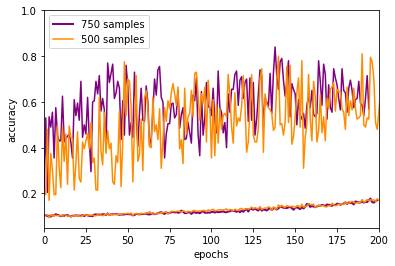

In [41]:
#%matplotlib notebook
#import matplotlib.pyplot as plt
plt.figure()
plt.plot(mean_accs8_750, label="750 samples", color="purple", linewidth=2)
plt.plot(mean_accs8_new, label="500 samples", color="darkorange", linewidth=1.5)
plt.plot(best_accs8_750, color="purple")
plt.plot(best_accs8_new, color="darkorange")
plt.xlim([0, 200])
plt.ylim([0.05, 1])
plt.legend(loc=0)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.show()

## Effect of baseline

In [33]:
mean_accs_baseline  =[0.10677, 0.10608000000000001, 0.10612, 0.09328, 0.10382999999999999, 0.10194, 0.10182, 0.10649000000000002, 0.10211, 0.10165, 0.10467000000000001, 0.10276000000000002, 0.10379, 0.10964, 0.10039000000000002, 0.10781, 0.103, 0.10389, 0.10326, 0.10371, 0.10399, 0.0992, 0.09953000000000001, 0.10343, 0.10434, 0.10696, 0.10303, 0.10603, 0.10577000000000002, 0.10125, 0.10452, 0.10105000000000001, 0.10672, 0.10282000000000001, 0.10674000000000002, 0.10067, 0.10528, 0.10412, 0.10974, 0.10527, 0.1107, 0.10690000000000001, 0.10625, 0.1076, 0.10691, 0.10660000000000001, 0.10928, 0.10791999999999999, 0.10831, 0.10790999999999999, 0.10855000000000001, 0.10973000000000002, 0.11204, 0.1009, 0.10981999999999999, 0.11032, 0.10596000000000001, 0.10287, 0.10937000000000001, 0.1103, 0.10959, 0.11329, 0.11511, 0.11408000000000001, 0.10676, 0.10993, 0.10843000000000001, 0.10557000000000001, 0.10590999999999999, 0.11203999999999999, 0.11019000000000001, 0.10883000000000001, 0.1134, 0.11833000000000002, 0.10833000000000001, 0.11193, 0.11578999999999999, 0.1156, 0.11707000000000001, 0.11592, 0.11299, 0.11328, 0.11449000000000001, 0.11815, 0.11030000000000001, 0.11105000000000001, 0.11551000000000002, 0.11747, 0.10999, 0.12090999999999999, 0.11175000000000002, 0.11278, 0.11384999999999999, 0.11198, 0.12155, 0.11848000000000002, 0.11728, 0.11504, 0.11695, 0.11371, 0.12069999999999999, 0.12247, 0.11869, 0.11852, 0.12014, 0.11845, 0.12079000000000002, 0.11793, 0.12204, 0.12163, 0.12099000000000001, 0.12159, 0.12253, 0.1199, 0.12573, 0.12085, 0.12304999999999999, 0.12855, 0.12899000000000002, 0.12396000000000001, 0.12722, 0.12481, 0.12279999999999999, 0.12779, 0.12913999999999998, 0.12103, 0.12431, 0.12038000000000001, 0.12103, 0.1262, 0.1194, 0.12756, 0.12694000000000003, 0.12422, 0.12602000000000002, 0.12876, 0.1228, 0.13185000000000002, 0.12524000000000002, 0.12481000000000002, 0.13909, 0.12730000000000002, 0.13663999999999998, 0.13119999999999998, 0.13584000000000004, 0.13828000000000004, 0.13513999999999998, 0.13414999999999996, 0.13482, 0.12744999999999998, 0.12949000000000002, 0.13701999999999998, 0.1467, 0.13443, 0.14223000000000002, 0.12955, 0.13041000000000003, 0.1393, 0.14968, 0.13989, 0.14293, 0.14408, 0.13234, 0.13867000000000002, 0.14096, 0.13897000000000004, 0.14041000000000003, 0.14102, 0.13437000000000002, 0.13416, 0.1433, 0.13768, 0.14908, 0.14744, 0.14163, 0.14815, 0.1497, 0.14799, 0.15277000000000002, 0.14671, 0.15472, 0.15352000000000002, 0.14844, 0.15506999999999999, 0.15829, 0.15589000000000003, 0.15253999999999998, 0.153, 0.14953999999999998, 0.15296, 0.16911, 0.15645, 0.15412, 0.16274, 0.16151, 0.16785, 0.15678, 0.16205, 0.159, 0.16832, 0.15722000000000003, 0.16648, 0.16569, 0.16231, 0.15687, 0.15589000000000003, 0.15422000000000002, 0.16279, 0.16426, 0.1617, 0.16504000000000002, 0.16284, 0.16625, 0.16903, 0.1705, 0.17243, 0.16728, 0.17632, 0.16134, 0.17982000000000004, 0.18075, 0.17104, 0.17786, 0.17324, 0.18344, 0.17958, 0.17620999999999998, 0.18106, 0.18894, 0.17732, 0.18725, 0.18702000000000002, 0.19035, 0.18982, 0.18786000000000003, 0.19117, 0.20291, 0.19013, 0.18554, 0.19132, 0.19468000000000002, 0.19635999999999998, 0.18766999999999995, 0.18883, 0.192, 0.18661000000000003, 0.19096, 0.18273, 0.19655, 0.19246000000000002, 0.18388, 0.19712000000000002, 0.19263999999999998, 0.21333, 0.19713, 0.20707, 0.19826999999999997, 0.191, 0.19444, 0.19684000000000001, 0.19666, 0.20226, 0.20217000000000002, 0.20032, 0.20062, 0.20258, 0.19334, 0.20241, 0.20776999999999998, 0.22066999999999998, 0.21219, 0.202, 0.20727, 0.20862, 0.21978, 0.21724000000000002, 0.21302000000000001, 0.21886, 0.22260000000000002, 0.23524, 0.22652999999999998, 0.24708, 0.23402, 0.22758, 0.22978, 0.24636, 0.24667, 0.2333, 0.21814000000000003, 0.23441, 0.24635, 0.23393, 0.24134999999999998, 0.24808, 0.25761, 0.23845, 0.25325000000000003, 0.24803999999999998, 0.25777, 0.25018, 0.24681999999999998, 0.25156, 0.24863000000000002, 0.25662, 0.23797000000000001, 0.26656, 0.25566, 0.23360999999999998, 0.25395, 0.26065999999999995, 0.26991, 0.27885000000000004, 0.26634, 0.26132000000000005, 0.24412, 0.25997000000000003, 0.25709000000000004, 0.25775, 0.25733000000000006, 0.25318, 0.25524, 0.27158, 0.28234, 0.27703999999999995, 0.28176999999999996, 0.26812, 0.27988, 0.29587, 0.28723000000000004, 0.27959999999999996, 0.29824, 0.28583000000000003, 0.28261000000000003, 0.28252, 0.31056, 0.26846000000000003, 0.28823, 0.29270999999999997, 0.29416, 0.27747999999999995, 0.27192, 0.27675, 0.30457999999999996, 0.2910500000000001, 0.28014, 0.28740999999999994, 0.27591999999999994, 0.29059, 0.29995, 0.31959000000000004]
best_accs_baseline = [0.21,
  0.195,
  0.505,
  0.175,
  0.355,
  0.34,
  0.21,
  0.26,
  0.44,
  0.365,
  0.21,
  0.485,
  0.34,
  0.5,
  0.215,
  0.495,
  0.51,
  0.48,
  0.23,
  0.415,
  0.52,
  0.27,
  0.255,
  0.44,
  0.35,
  0.415,
  0.425,
  0.35,
  0.54,
  0.285,
  0.415,
  0.315,
  0.265,
  0.635,
  0.39,
  0.3,
  0.525,
  0.39,
  0.505,
  0.425,
  0.41,
  0.25,
  0.235,
  0.39,
  0.305,
  0.495,
  0.255,
  0.38,
  0.75,
  0.53,
  0.615,
  0.655,
  0.53,
  0.28,
  0.515,
  0.68,
  0.33,
  0.375,
  0.46,
  0.315,
  0.625,
  0.635,
  0.52,
  0.35,
  0.375,
  0.525,
  0.53,
  0.495,
  0.425,
  0.53,
  0.3,
  0.415,
  0.58,
  0.565,
  0.615,
  0.585,
  0.625,
  0.645,
  0.635,
  0.615,
  0.59,
  0.39,
  0.435,
  0.36,
  0.6,
  0.415,
  0.485,
  0.6,
  0.685,
  0.55,
  0.685,
  0.72,
  0.6,
  0.49,
  0.665,
  0.635,
  0.665,
  0.365,
  0.65,
  0.585,
  0.33,
  0.71,
  0.415,
  0.6,
  0.47,
  0.555,
  0.535,
  0.595,
  0.535,
  0.53,
  0.725,
  0.655,
  0.445,
  0.45,
  0.685,
  0.535,
  0.555,
  0.53,
  0.6,
  0.72,
  0.565,
  0.435,
  0.425,
  0.605,
  0.645,
  0.42,
  0.54,
  0.36,
  0.405,
  0.705,
  0.73,
  0.395,
  0.53,
  0.485,
  0.57,
  0.46,
  0.46,
  0.395,
  0.53,
  0.635,
  0.785,
  0.495,
  0.495,
  0.43,
  0.47,
  0.75,
  0.52,
  0.775,
  0.39,
  0.41,
  0.48,
  0.595,
  0.65,
  0.535,
  0.71,
  0.325,
  0.395,
  0.53,
  0.69,
  0.49,
  0.495,
  0.695,
  0.625,
  0.515,
  0.46,
  0.67,
  0.44,
  0.6,
  0.655,
  0.595,
  0.565,
  0.665,
  0.645,
  0.675,
  0.555,
  0.645,
  0.63,
  0.57,
  0.615,
  0.5,
  0.425,
  0.68,
  0.54,
  0.55,
  0.585,
  0.665,
  0.63,
  0.495,
  0.535,
  0.445,
  0.8,
  0.53,
  0.565,
  0.595,
  0.51,
  0.79,
  0.765,
  0.715,
  0.515,
  0.485,
  0.565,
  0.615,
  0.6,
  0.53,
  0.505,
  0.425,
  0.505,
  0.51,
  0.455,
  0.475,
  0.695,
  0.745,
  0.5,
  0.53,
  0.75,
  0.615,
  0.48,
  0.435,
  0.39,
  0.515,
  0.78,
  0.57,
  0.74,
  0.745,
  0.545,
  0.51,
  0.515,
  0.64,
  0.765,
  0.72,
  0.61,
  0.705,
  0.56,
  0.525,
  0.51,
  0.705,
  0.73,
  0.61,
  0.68,
  0.765,
  0.715,
  0.585,
  0.71,
  0.44,
  0.72,
  0.62,
  0.61,
  0.62,
  0.685,
  0.64,
  0.59,
  0.495,
  0.66,
  0.625,
  0.55,
  0.545,
  0.575,
  0.67,
  0.56,
  0.67,
  0.71,
  0.58,
  0.6,
  0.59,
  0.54,
  0.45,
  0.66,
  0.54,
  0.535,
  0.71,
  0.625,
  0.705,
  0.765,
  0.625,
  0.75,
  0.71,
  0.66,
  0.675,
  0.69,
  0.635,
  0.725,
  0.795,
  0.715,
  0.6,
  0.585,
  0.57,
  0.705,
  0.745,
  0.705,
  0.59,
  0.715,
  0.605,
  0.755,
  0.565,
  0.62,
  0.585,
  0.73,
  0.68,
  0.535,
  0.695,
  0.76,
  0.565,
  0.65,
  0.67,
  0.66,
  0.77,
  0.66,
  0.53,
  0.73,
  0.675,
  0.595,
  0.77,
  0.665,
  0.6,
  0.625,
  0.725,
  0.65,
  0.63,
  0.61,
  0.66,
  0.725,
  0.65,
  0.815,
  0.655,
  0.74,
  0.665,
  0.785,
  0.735,
  0.68,
  0.675,
  0.74,
  0.7,
  0.71,
  0.7,
  0.765,
  0.595,
  0.75,
  0.7,
  0.725,
  0.72,
  0.8,
  0.675,
  0.72,
  0.655,
  0.59]

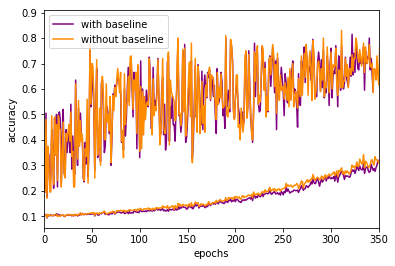

In [39]:
plt.figure()
plt.plot(mean_accs_baseline, label="with baseline", color="purple")
plt.plot(mean_accs8_new, label="without baseline", color="darkorange")
plt.plot(best_accs_baseline, color="purple")
plt.plot(best_accs8_new, color="darkorange")
plt.xlim([0, 350])
#plt.ylim([0.05, 1])
plt.legend(loc=0)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.show()

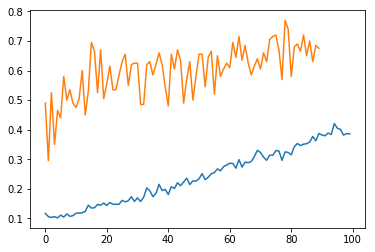

In [44]:
mean5_cor = [0.1168, 0.106025, 0.10317499999999999, 0.10594999999999999, 0.10157500000000001, 0.11095000000000001, 0.10445, 0.1153, 0.10675000000000001, 0.10925000000000001, 0.1175, 0.11807500000000001, 0.11899999999999998, 0.12360000000000002, 0.1448, 0.134825, 0.1361, 0.14705000000000001, 0.14470000000000002, 0.1516, 0.14392499999999997, 0.153425, 0.14775, 0.147575, 0.14795, 0.160925, 0.15567499999999998, 0.159775, 0.17342500000000002, 0.157575, 0.169175, 0.157075, 0.17157499999999998, 0.203075, 0.193475, 0.17347500000000005, 0.18427500000000002, 0.21502499999999997, 0.194025, 0.19797499999999998, 0.18072499999999997, 0.20705, 0.20125, 0.22037500000000002, 0.21055, 0.22299999999999998, 0.236125, 0.21435, 0.22685, 0.226, 0.23369999999999996, 0.25127499999999997, 0.23085, 0.23910000000000003, 0.25085, 0.254875, 0.26745, 0.26085, 0.27482500000000004, 0.28059999999999996, 0.2863, 0.2856, 0.26990000000000003, 0.29865, 0.27335, 0.2903, 0.28814999999999996, 0.292, 0.30912500000000004, 0.330175, 0.3229000000000001, 0.306975, 0.29645000000000005, 0.313975, 0.313325, 0.32899999999999996, 0.32775000000000004, 0.296125, 0.32487499999999997, 0.322975, 0.31472500000000003, 0.34247500000000003, 0.353275, 0.346175, 0.35095, 0.352375, 0.35837500000000005, 0.37689999999999996, 0.36245000000000005, 0.38732500000000003, 0.38167500000000004, 0.379375, 0.38862500000000005, 0.383625, 0.420475, 0.4048, 0.4011, 0.381575, 0.3868, 0.38550000000000006]
mean_5b_cor = [0.49,
  0.295,
  0.525,
  0.35,
  0.465,
  0.44,
  0.58,
  0.5,
  0.535,
  0.49,
  0.475,
  0.505,
  0.6,
  0.45,
  0.53,
  0.695,
  0.665,
  0.525,
  0.67,
  0.505,
  0.555,
  0.615,
  0.535,
  0.535,
  0.585,
  0.63,
  0.655,
  0.55,
  0.62,
  0.625,
  0.625,
  0.485,
  0.485,
  0.62,
  0.63,
  0.585,
  0.62,
  0.66,
  0.62,
  0.545,
  0.48,
  0.655,
  0.605,
  0.67,
  0.635,
  0.49,
  0.57,
  0.63,
  0.5,
  0.58,
  0.655,
  0.655,
  0.545,
  0.645,
  0.665,
  0.52,
  0.65,
  0.58,
  0.605,
  0.625,
  0.61,
  0.695,
  0.645,
  0.715,
  0.635,
  0.685,
  0.625,
  0.585,
  0.615,
  0.64,
  0.605,
  0.66,
  0.63,
  0.705,
  0.715,
  0.72,
  0.67,
  0.57,
  0.77,
  0.74,
  0.58,
  0.68,
  0.69,
  0.665,
  0.72,
  0.65,
  0.7,
  0.63,
  0.685,
  0.675]
plt.figure()
plt.plot(mean5_cor)
plt.plot(mean_5b_cor)

In [45]:
from collections import OrderedDict
import torch.tensor as tensor

In [47]:
mean_accs_5_200_corcont = [11.75
,10.64
,10.21
,11.35
,10.57
,10.74
,10.70
,11.33
,11.50
,11.35
,12.43
,12.57
,12.31
,12.88
,14.54
,13.60
,14.34
,15.39
,14.79
,15.55
,14.85
,16.54
,15.80
,15.13
,15.22
,16.26
,16.18
,16.02
,17.28
,16.03
,17.73
,17.05
,18.94
,20.84
,19.77
,17.96
,19.63
,23.46
,20.62
,21.07
,19.47
,22.05
,21.02
,23.20
,22.20
,23.80
,24.13
,22.63
,24.57
,24.96
,24.98
,26.45
,24.05
,24.80
,24.78
,25.87
,27.66
,28.68
,28.26
,28.12
,30.01
,29.70
,29.24
,30.73
,29.00
,30.13
,30.59
,30.62
,31.99
,34.57
,33.22
,32.21
,31.58
,31.78
,32.63
,34.46
,33.58
,30.92
,33.94
,33.09
,34.39
,34.34
,35.33
,35.88
,34.52
,36.02
,36.17
,38.96
,36.34
,38.20
,36.47
,38.40
,39.05
,37.82
,42.76
,40.56
,40.23
,37.38
,38.84
,38.61
,39.67
,42.52
,40.88
,39.39
,40.65
,41.17
,38.45
,39.33
,40.31
,36.90
,40.12
,39.06
,44.49
,39.37
,42.75
,41.28
,38.83
,40.01
,44.55
,44.23
,43.98
,46.17
,41.88
,44.81
,45.28
,47.81
,46.05
,42.58
,44.00
,44.99
,47.90
,44.38
,43.70
,45.95
,44.94
,45.73
,42.69
,47.61
,45.10
,45.23
,46.92
,47.39
,43.89
,45.60
,43.77
,47.14
,44.76
,43.90
,45.63
,44.24
,40.76
,43.86
,45.59
,45.54
,43.52
,43.87
,45.47
,47.47
,46.85
,49.53
,50.13
,51.87
,46.61
,53.19
,47.17
,44.75
,50.25
,46.56
,51.91
,46.86
,48.86
,44.87
,47.66
,49.13
,45.40
,43.90
,43.37
,41.70
,48.10
,46.02
,45.57
,43.65
,47.35
,47.74
,47.34
,45.67
,44.59
,41.94
,47.06
,47.37
,50.03
,50.03
,50.85
,49.09
,53.33
,50.77
,49.17
,46.32
,47.00
,48.59
,48.35
,48.95
,47.99
,52.20
,51.30
,49.27
,50.15
,52.76
,50.80
,50.28
,52.01
,49.45
,51.92
,52.55
,53.94
,51.88
,50.22
,51.95
,49.59
,52.64
,55.10
,51.28
,52.95
,51.84
,48.89
,51.69
,49.75
,58.36
,51.91
,52.26
,51.99
,49.14
,51.12
,54.16
,52.07
,55.33
,54.25
,54.52
,54.55
,55.29
,52.53
,57.34
,55.27
,53.55
,55.00
,51.16
,54.45
,55.60
,50.84
,50.75
,52.38
,47.56
,54.76
,55.51
,51.56
,57.00
,54.04
,54.28
,55.05
,55.96
,54.83
,58.44
,59.06
,56.27]

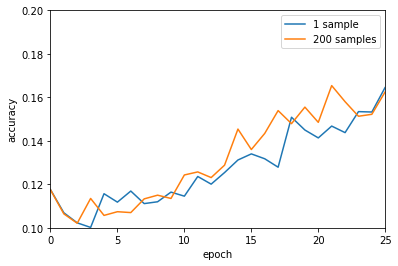

In [60]:
%matplotlib inline
plt.figure()
plt.plot(mean_accs5_wobase, label="1 sample")
plt.plot(np.array(mean_accs_5_200_corcont)/100, label="200 samples")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend(loc=0)
plt.xlim([0, 25])
plt.ylim([0.1, 0.2])
plt.show()